In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sb

In [3]:
import sklearn as sk

In [21]:
from scipy.sparse import dok_matrix, csr_matrix

In [5]:
ls ../data

events.csv  heroes.csv  lh.csv    train.csv
gold.csv    items.csv   test.csv  xp.csv


In [6]:
tr = pd.read_csv('../data/train.csv')
tr.head(5)

,mid,radiant_won
0,44380,1
1,19687,1
2,10801,0
3,32220,1
4,23207,1


In [7]:
hr = pd.read_csv('../data/heroes.csv')
hr.head(5)

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,4,25,15,75,29,95,3,32,55,64,86
4,5,65,6,81,25,71,75,42,101,96,109


In [8]:
tr.shape, hr.shape

((14984, 2), (24974, 11))

In [9]:
hre = pd.merge(tr, hr, on = 'mid')
hre.head(5)

,mid,radiant_won,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,44380,1,76,96,92,72,64,15,86,75,29,11
1,19687,1,1,64,90,29,11,71,101,74,86,66
2,10801,0,35,75,41,110,19,7,69,86,11,72
3,32220,1,106,11,76,6,77,104,18,96,64,55
4,23207,1,8,75,1,88,69,11,39,82,24,55


In [24]:
hre.shape

(14984, 12)

In [10]:
radt = ['player_{i}'.format(i = i) for i in range(0, 5)]
dire = ['player_{i}'.format(i = i) for i in range(5, 10)]
radtm, direm = [*radt, 'mid'], [*dire, 'mid']

In [11]:
hrs = np.unique(hr[[*radt, *dire]])
hrs.shape

(111,)

In [12]:
radt_win, dire_win = hre[hre['radiant_won'] == 1], hre[hre['radiant_won'] == 0]
radt_win_cm, dire_win_cm = radt_win[radtm], dire_win[direm]
radt_lse_cm, dire_lse_cm = dire_win[radtm], radt_win[direm]

(array([   4.,  753.,  133.,  710.,  233.,  230.,  210.,   64.,  639.,
         200.,   97.,  513.,  207.,  223.,   90., 1279.,  233.,  311.,
          74.,  579.,  369.,  120.,  278.,   88.,  809.,  235.,  201.,
         256.,  151.,  463.,  124.,  582.,  685.,  107.,  432.,  264.,
         118.,  151.,  132.,  544.,  576.,  236.,  314.,  101.,  310.,
         210.,  200.,  284.,  197.,  261.,  283.,   89.,  288.,  188.,
         229.,  406.,  119.,  481.,  209.,  353.,  299.,  202.,   84.,
          37., 1552.,  415.,  479.,  523.,  267.,  810.,  238.,  475.,
         503.,  192.,  642.,  849.,  500.,  125.,   73.,   80.,  105.,
         661.,  716.,   78.,  164.,  137.,  555.,  127.,  288.,  353.,
         218.,  659.,  341.,  195.,  684.,   88.,  483.,  160.,  145.,
         199.,   75.,  602.,  177.,  192.,  503.,  111.,  153.,  271.,
         237.,  287.,  316.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  

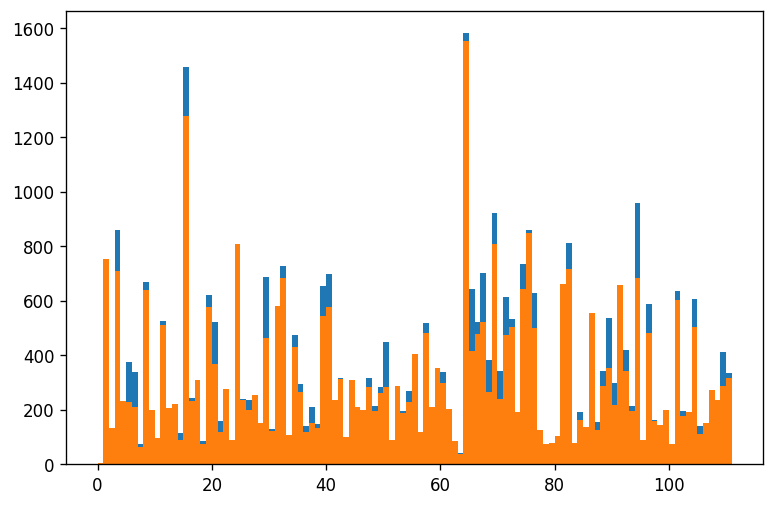

In [13]:
plt.figure(figsize = (7.5, 5.), dpi = 120)
plt.hist(radt_win_cm[radt].to_numpy().reshape(-1), bins = np.arange(hrs.shape[0] + 1))
plt.hist(radt_lse_cm[radt].to_numpy().reshape(-1), bins = np.arange(hrs.shape[0] + 1))

In [14]:
radt_win_cm.shape, dire_win_cm.shape, radt_lse_cm.shape, dire_lse_cm.shape

((7814, 6), (7170, 6), (7170, 6), (7814, 6))

In [15]:
win_set_np = np.sort(np.vstack((radt_win_cm[radt], dire_win_cm[dire])), axis = 1)
lse_set_np = np.sort(np.vstack((radt_lse_cm[radt], dire_lse_cm[dire])), axis = 1)

In [16]:
win_set_pd, lse_set_pd = pd.DataFrame(win_set_np), pd.DataFrame(lse_set_np)

(array([  10., 1560.,  268., 1501.,  483.,  534.,  437.,  127., 1392.,
         416.,  215., 1146.,  417.,  434.,  211., 2488.,  449.,  675.,
         156., 1168.,  795.,  283.,  575.,  172., 1735.,  488.,  410.,
         545.,  304.,  954.,  274., 1180., 1427.,  222.,  894.,  564.,
         279.,  342.,  311., 1077., 1176.,  508.,  636.,  202.,  645.,
         421.,  442.,  605.,  410.,  540.,  593.,  181.,  555.,  383.,
         446.,  854.,  250., 1026.,  418.,  749.,  608.,  410.,  173.,
          96., 3240.,  838., 1010., 1065.,  626., 1677.,  526., 1009.,
        1041.,  407., 1362., 1768., 1040.,  268.,  145.,  148.,  238.,
        1437., 1500.,  152.,  345.,  281., 1210.,  242.,  600.,  774.,
         491., 1370.,  682.,  404., 1462.,  167., 1002.,  332.,  306.,
         375.,  154., 1312.,  342.,  411., 1069.,  251.,  285.,  564.,
         495.,  596.,  656.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  

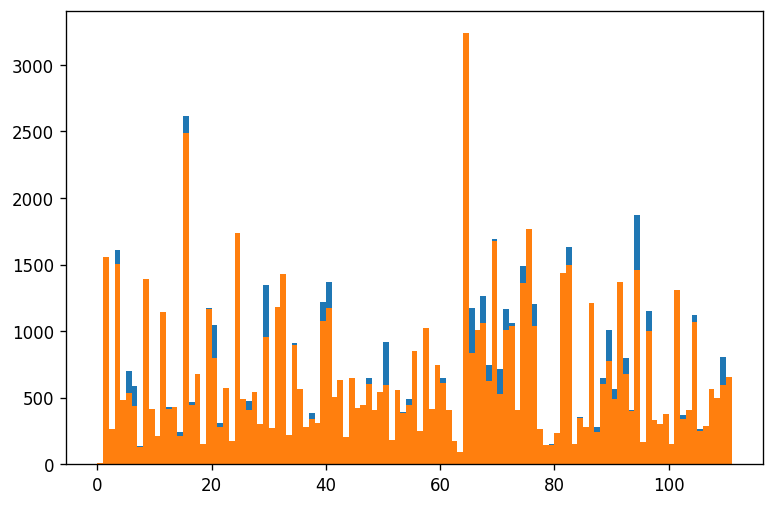

In [17]:
plt.figure(figsize = (7.5, 5.), dpi = 120)
plt.hist(win_set_np.reshape(-1), bins = np.arange(hrs.shape[0] + 1))
plt.hist(lse_set_np.reshape(-1), bins = np.arange(hrs.shape[0] + 1))

In [18]:
from sklearn.svm import SVC

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.metrics import roc_auc_score

In [32]:
nc, nr = 5, hre.shape[0]
rows = np.repeat(hre.index.to_numpy(), nc)
cols_radt, cols_dire = hre[radt].to_numpy().reshape(nc * nr), hre[dire].to_numpy().reshape(nc * nr)
csr_radt, csr_dire = csr_matrix((np.ones(nr * nc), (rows, cols_radt))), csr_matrix((np.ones(nr * nc), (rows, cols_dire)))

In [38]:
csr_radt.shape, csr_dire.shape

((14984, 111), (14984, 111))

In [54]:
nh = hrs.shape[0]
hrem = pd.DataFrame(np.hstack((hre[radt].to_numpy(), hre[dire].to_numpy() + nh)))

In [55]:
hrem.shape

(14984, 10)

In [70]:
fnc = nc * 2
frows = np.repeat(hrem.index.to_numpy(), fnc)
print(frows[:15])
fcols = hrem.to_numpy().reshape(fnc * nr)
csr_full = csr_matrix((np.ones(fnc * nr), (frows, fcols)))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [63]:
tr_res = hre['radiant_won']

In [67]:
knn_cls = KNeighborsClassifier(n_neighbors = 3, algorithm = 'brute', n_jobs = 16)
knn_cls.fit(csr_full, tr_res)

KNeighborsClassifier(algorithm='brute', n_jobs=16, n_neighbors=3)

In [68]:
res_cls = knn_cls.predict(csr_full)

In [69]:
roc_auc_score(tr_res, res_cls)

0.7583458185233456